Libraries

In [1]:
import tensorflow as tf ; from tensorflow import keras ; import numpy as np ; import pandas as pd
import matplotlib.pyplot as plt ; from keras.preprocessing.image import load_img ;

Making DataFrame

In [2]:
Train_path = "../Data/Train.csv"
Test_path = "../Data/Test.csv"

In [3]:
df_train = pd.read_csv(Train_path)
df_train = pd.DataFrame(df_train)
df_test = pd.read_csv(Test_path)
df_test = pd.DataFrame(df_test)

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
x_train = df_train.drop("label" , axis = 1)
y_train = df_train["label"]
x_test = df_train.drop("label" , axis = 1)
y_test = df_train["label"]

In [6]:
set(y_test).__len__() # Z and J are out ====> 24 labels

24

In [7]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((27455, 784), (27455,), (27455, 784), (27455,))

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
from keras.utils import to_categorical
y_train = np.array(y_train)
y_train = to_categorical(y_train)
y_test = np.array(y_test)
y_test = to_categorical(y_test)

In [10]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1 , 28 , 28 , 1)
x_test = np.array(x_test)
x_test = x_test.reshape(-1 , 28 , 28 , 1)


In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(512 , kernel_size=(3,3) , activation = "relu" , input_shape = (28 , 28 , 1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(256 , kernel_size=(3,3) , activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(128 , kernel_size=(3,3) , activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64 , activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(25 , activation = "softmax"))

model.compile(optimizer = "adam" , loss = tf.losses.categorical_crossentropy , metrics = ["accuracy"])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,489,945 (5.68 MB)

 Trainable params: 1,489,945 (5.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = model.fit(x_train , y_train , epochs = 10 , batch_size = 256 , validation_data = (x_test , y_test))

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 685ms/step - accuracy: 0.0526 - loss: 3.1829 - val_accuracy: 0.2478 - val_loss: 2.5037
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 74s 686ms/step - accuracy: 0.2640 - loss: 2.3183 - val_accuracy: 0.7061 - val_loss: 1.0752
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 694ms/step - accuracy: 0.5389 - loss: 1.3484 - val_accuracy: 0.8528 - val_loss: 0.5724
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 699ms/step - accuracy: 0.6831 - loss: 0.9193 - val_accuracy: 0.9098 - val_loss: 0.3699
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 74s 689ms/step - accuracy: 0.7586 - loss: 0.6976 - val_accuracy: 0.9425 - val_loss: 0.2335
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 696ms/step - accuracy: 0.8045 - loss: 0.5712 - val_accuracy: 0.9686 - val_loss: 0.1492
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 74s 685ms/step - accuracy: 0.8398 - loss: 0.4608 - val_accuracy: 0.9840 - val_loss: 0.1056
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 75s 694ms/step - accuracy: 0.8739 - loss: 0

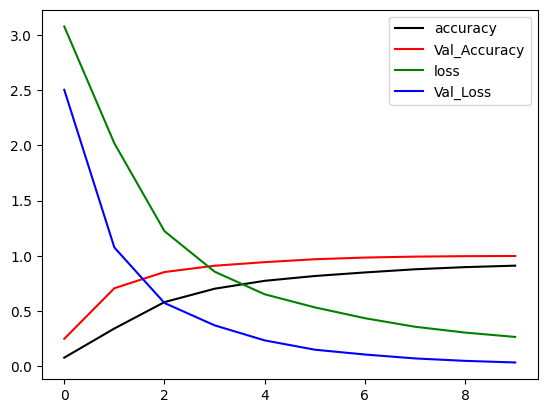

In [14]:
plt.plot(hist.history["accuracy"] , color = "black" , label = "accuracy")
plt.plot(hist.history["val_accuracy"] , color = "red"  , label = "Val_Accuracy")
plt.plot(hist.history["loss"] , color = "green" , label = "loss")
plt.plot(hist.history["val_loss"] , color = "blue" , label = "Val_Loss")
plt.legend()

In [172]:
model_json = model.to_json()
with open("model.json" , "w") as file:
    file.write(model_json)
model.save("model.h5")